In [1]:
import pandas as pd

df= pd.read_csv("sales_data_with_discounts.csv")
df.head(10)

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
5,01-04-2021,Thursday,M06,C,3,Mobiles,RealU,RU-9,8100,24300,16.996489,4130.146805,20169.853195
6,01-04-2021,Thursday,M07,C,3,Mobiles,Sumsang,S-20,49100,147300,9.228812,13594.039719,133705.960281
7,01-04-2021,Thursday,M08,C,2,Mobiles,Sumsang,S-21,54100,108200,5.553719,6009.124321,102190.875679
8,01-04-2021,Thursday,M09,C,2,Mobiles,Orange,O-10,55100,110200,7.410104,8165.935144,102034.064856
9,01-04-2021,Thursday,M10,C,3,Mobiles,Orange,O-11,60100,180300,9.928444,17900.983733,162399.016267


In [2]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
print(numerical_cols)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [3]:
#mean
nClm_mean=df[numerical_cols].mean()
nClm_mean

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [4]:
#median
nClm_median=df[numerical_cols].median()
nClm_median

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [5]:
#mode
nClm_mode=df[numerical_cols].mode().iloc[0]
nClm_mode

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [6]:
#std
nClm_std=df[numerical_cols].std()
nClm_std

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

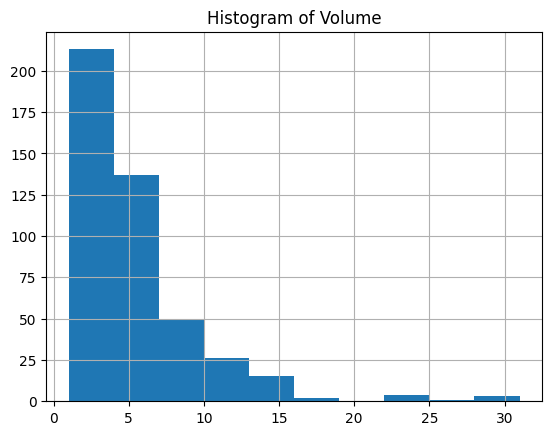

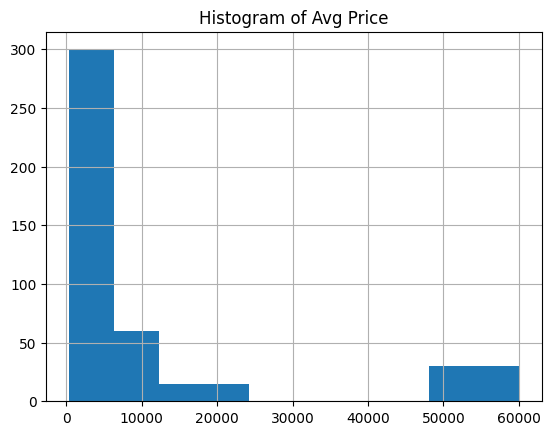

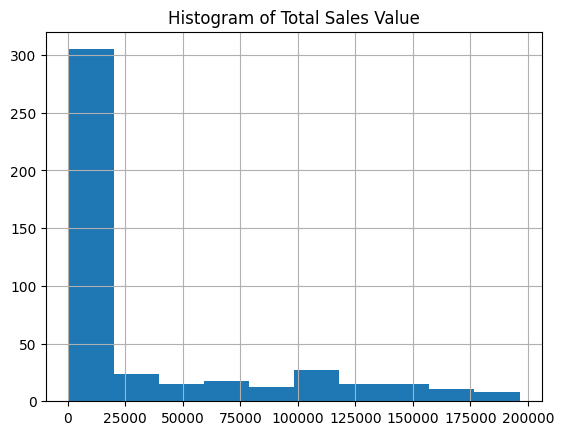

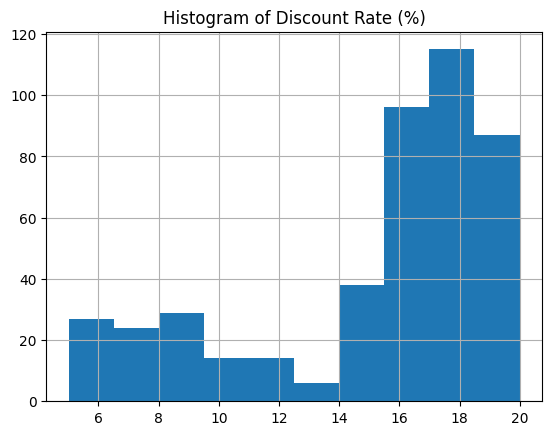

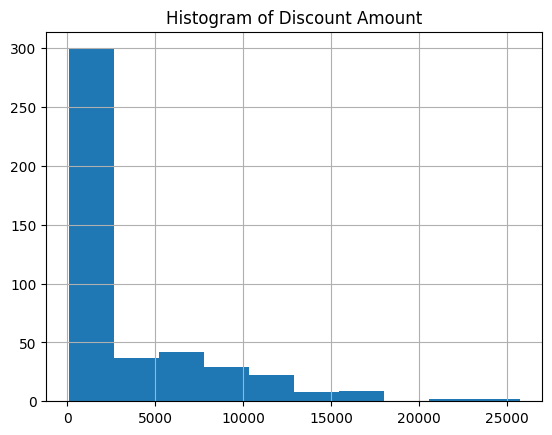

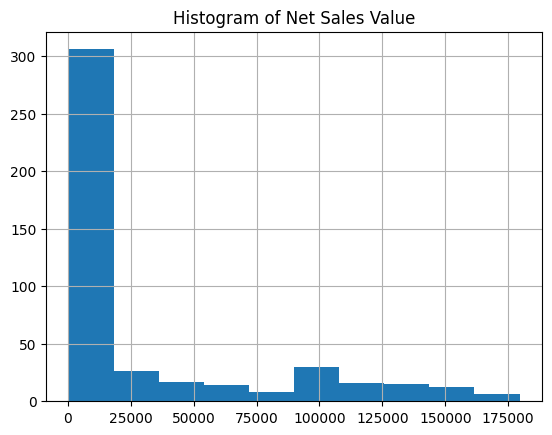

In [7]:
import matplotlib.pyplot as plt

for col in  numerical_cols:
  df[col].hist()
  plt.title(f'Histogram of {col}')
  plt.show()

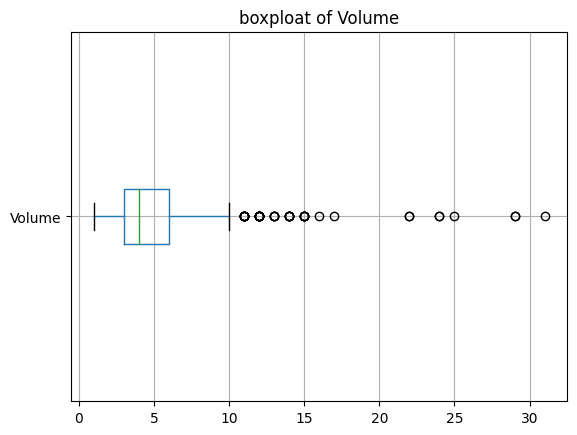

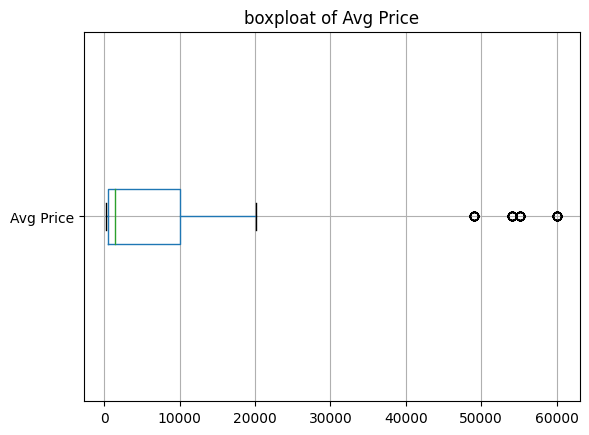

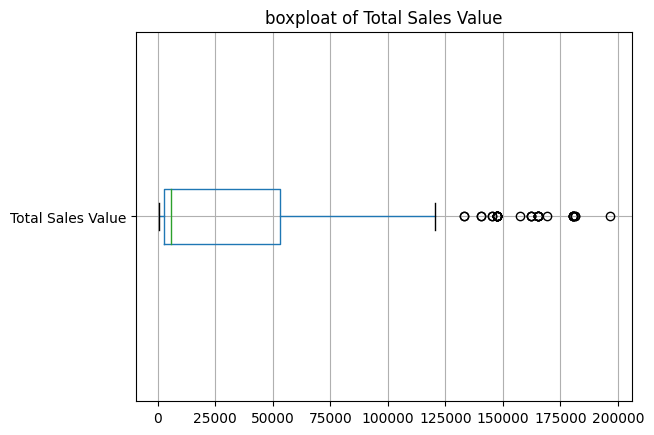

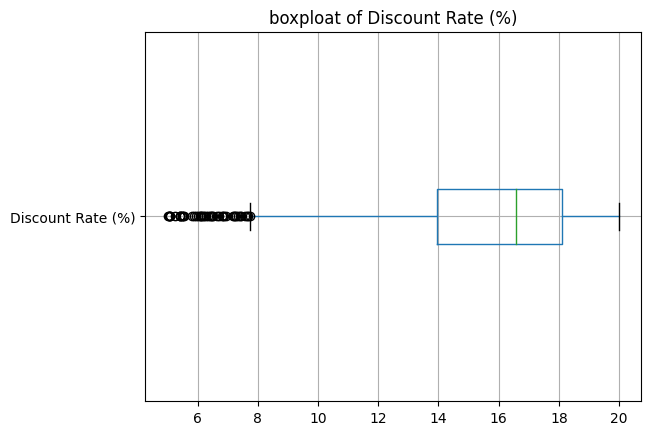

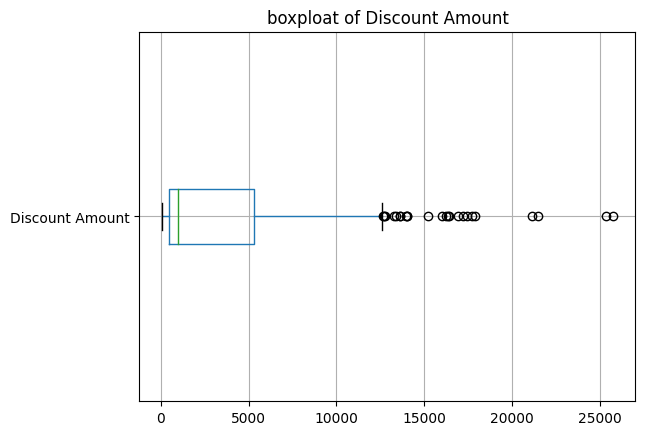

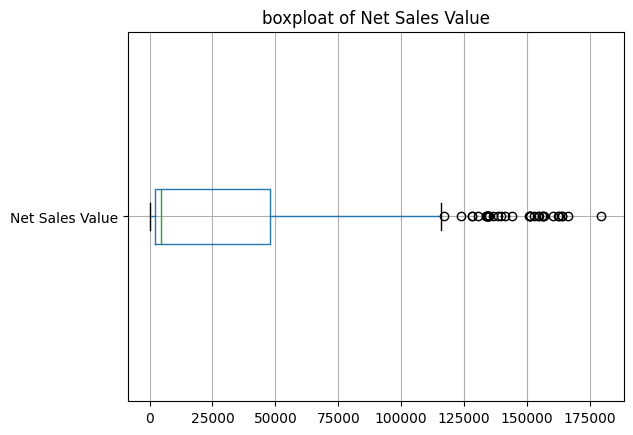

In [8]:
for col in  numerical_cols:
  df.boxplot([col], vert=False)
  plt.title(f'boxploat of {col}')
  plt.show()

In [9]:
catagorical_cols = df.select_dtypes(include=['object']).columns
print(catagorical_cols)

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [10]:
catagorical_cols=catagorical_cols.drop("Date")

In [11]:
df[catagorical_cols]

,Day,SKU,City,BU,Brand,Model
0,Thursday,M01,C,Mobiles,RealU,RU-10
1,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,Thursday,M03,C,Mobiles,YouM,YM-99
3,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...
445,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,Thursday,L07,C,Lifestyle,Viva,W-Western
447,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,Thursday,L09,C,Lifestyle,Jeera,M-Formals


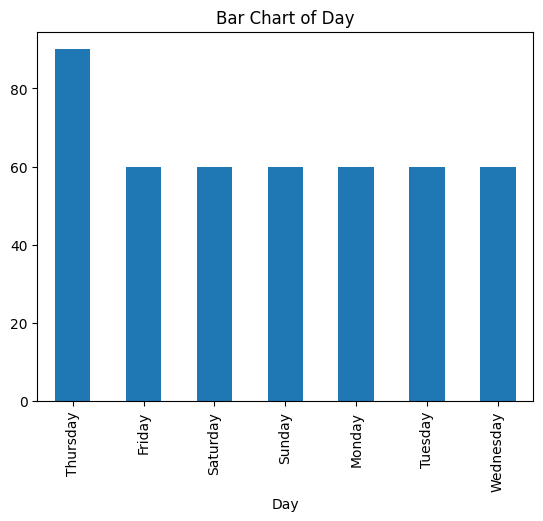

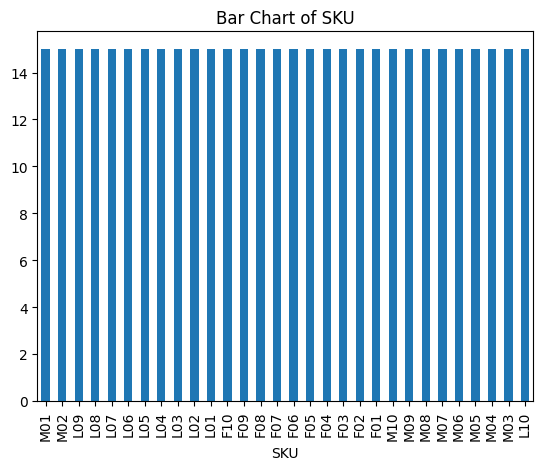

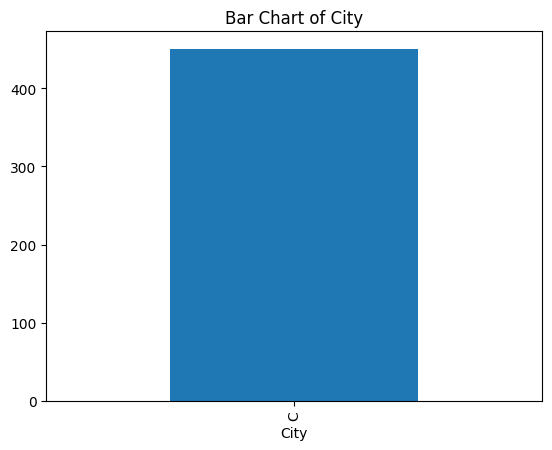

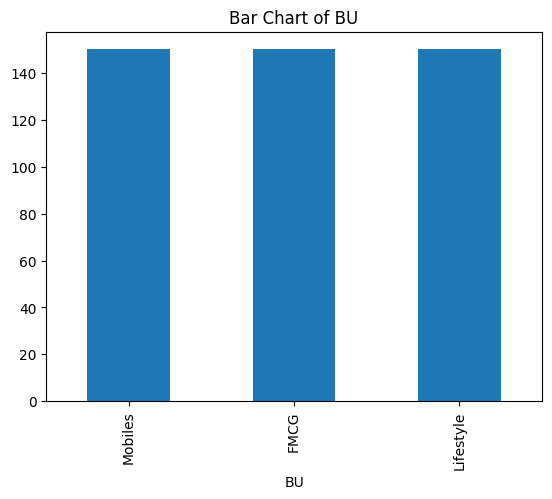

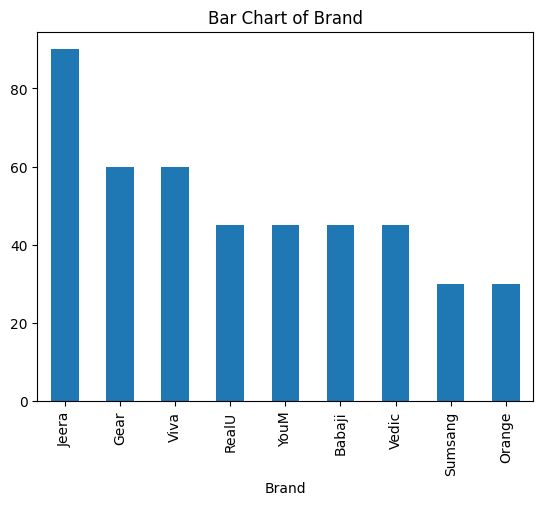

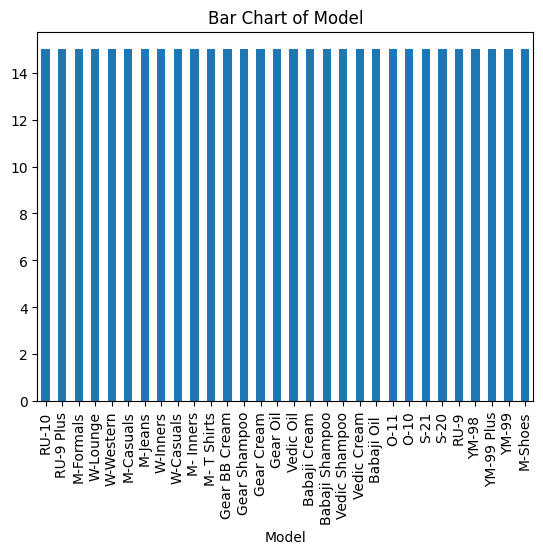

In [12]:

for col in catagorical_cols:
  df[col].value_counts().plot(kind='bar')
  plt.title(f'Bar Chart of {col}')
  plt.show()


In [18]:
numerical_colsdf=df[numerical_cols]
stndz_df=pd.DataFrame()
for col in numerical_cols:
  stand=[]

  for x in numerical_colsdf[col]:
      z=(x-numerical_colsdf[col].mean())/numerical_colsdf[col].std()
      stand.append(z)

  stndz_df[f'{col} standerdization']=stand

stndz_df





,Volume standerdization,Avg Price standerdization,Total Sales Value standerdization,Discount Rate (%) standerdization,Discount Amount standerdization,Net Sales Value standerdization
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


In [23]:
ohe_catgColumn=pd.get_dummies(df[catagorical_cols], dtype=int)
ohe_catgColumn

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,SKU_F01,SKU_F02,SKU_F03,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
